In [111]:
import os
import random
import json
import matplotlib.pyplot as plt
import cv2
with open('./cat_dog/cat_dog/cat_dog_annotations.json', "r") as json_file:
    data = json.load(json_file)



In [112]:
# Fetch an image and data from VGG formatted JSON annotations
filename, image_metadata = next(iter(data['_via_img_metadata'].items()))


print(f"Filename: {filename}")
print(f"Region: {image_metadata['regions']}")
print(f"Size: {image_metadata['size']}")

Filename: 1.jpeg45602
Region: [{'shape_attributes': {'name': 'rect', 'x': 284, 'y': 27, 'width': 365, 'height': 478}, 'region_attributes': {'class': {'dog': True}}}]
Size: 45602


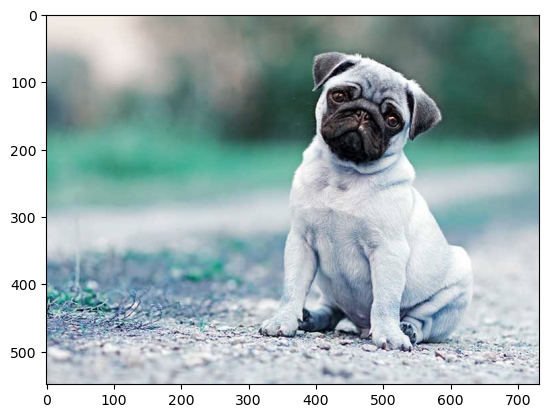

In [113]:
# Load that image
filename = image_metadata['filename']
first_image = cv2.imread(f'./cat_dog/cat_dog/{filename}')
plt.imshow(first_image)

X: 284
Y: 27
Width: 365
Height: 478
Animal class: dog


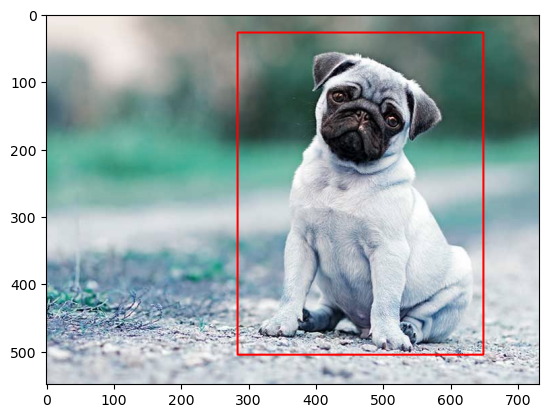

In [114]:
# Iterate over each region in the first image
for region in image_metadata['regions']:
    shape_attributes = region['shape_attributes']
    x = shape_attributes['x']
    y = shape_attributes['y']
    width = shape_attributes['width']
    height = shape_attributes['height']
    
    region_attributes = region['region_attributes']
    animal_class = next(iter(region_attributes['class']))
    
    cv2.rectangle(first_image, (x, y), (x + width, y + height), (255, 0, 0), 2)

    
    print(f"X: {x}")
    print(f"Y: {y}")
    print(f"Width: {width}")
    print(f"Height: {height}")
    print(f"Animal class: {animal_class}")
    
    plt.imshow(first_image)

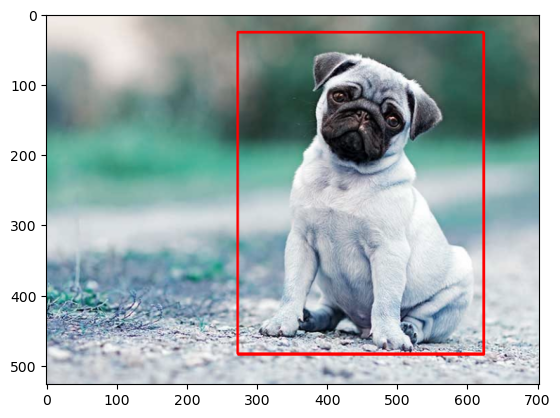

In [143]:
# Resize first image from resize scale percentage 60 to 100 randomly. 
resize_scale = random.randint(60, 100) / 100
img_resized = cv2.resize(first_image, None, fx=resize_scale, fy=resize_scale)

for region in image_metadata['regions']:
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        width = region['shape_attributes']['width']
        height = region['shape_attributes']['height']
        

        x = int(x * resize_scale)
        y = int(y * resize_scale)
        width = int(width * resize_scale)
        height = int(height * resize_scale)
        
        cv2.rectangle(img_resized, (x, y), (x + width, y + height), (255, 0, 0), 2)
        
        images = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

plt.imshow(img_resized)


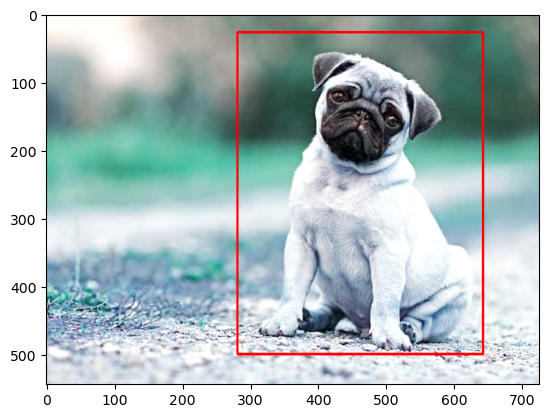

In [134]:
# Add random brightness to that resized image.
brightness = random.randint(5, 15)/ 10
bright_img = cv2.convertScaleAbs(img_resized, alpha=brightness, beta=0)
plt.imshow(bright_img)

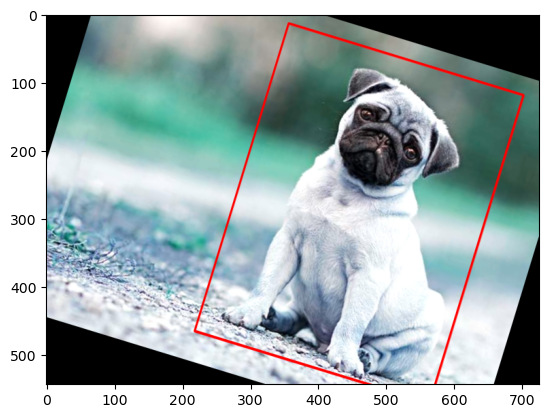

In [138]:
# Rotate that brighter image on an angle n
angle = random.randint(5, 360)
height, width = bright_img.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
rotated_img = cv2.warpAffine(bright_img, rotation_matrix, (width, height))

plt.imshow(rotated_img)

In [125]:
# Save the resulting image on disk
if not os.path.exists('result'):
    os.makedirs('result')
    
cv2.imwrite('./result/first_image.jpeg', rotated_img)

True

In [126]:
# Repeat steps for all remaining images with angle 5 to 355

if not os.path.exists('result'):
        os.makedirs('result')
for img_id, img_data in data['_via_img_metadata'].items():
    img_name = img_data['filename']
    

    img = cv2.imread(f'./cat_dog/cat_dog/{img_name}')
    resize_scale = random.randint(60, 100) / 100
    img_resized = cv2.resize(img, None, fx=resize_scale, fy=resize_scale)
    
    
    for region in img_data['regions']:
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        width = region['shape_attributes']['width']
        height = region['shape_attributes']['height']
        

        x = int(x * resize_scale)
        y = int(y * resize_scale)
        width = int(width * resize_scale)
        height = int(height * resize_scale)
        
        cv2.rectangle(img_resized, (x, y), (x + width, y + height), (255, 0, 0), 2)
        
        images = cv2.cvtColor(img_resized, cv2.COLOR_RGB2RGBA)
        
        # Adding Brightness to the images
        brightness = random.randint(5, 15)/ 10
        bright_img = cv2.convertScaleAbs(images, alpha=brightness, beta=0)

        angle = 5
        name = 1

    
    for no in range(1, 73):
    
        height, width = bright_img.shape[:2]
        
        rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
        
        rotated_img = cv2.warpAffine(bright_img, rotation_matrix, (width, height))
        
        
        angle += 5
        name += 1
       
        
        cv2.imwrite(f'result/{img_name}_{name}.png', rotated_img)
    

        
        

In [127]:
# Storing in COCO Format
coco_dict = {
    "info": {},
    "licenses": [],
    "images": [],
    "annotations": [],
    "categories": []
}


coco_dict["categories"].append({
    "id": 1,
    "name": "dog",
    "supercategory": ""
})
coco_dict["categories"].append({
    "id": 2,
    "name": "cat",
    "supercategory": ""
})


for key, val in data['_via_img_metadata'].items():
    # create a new image entry in coco dictionary
    coco_image = {
        "id": int(key.split('.')[0]),
        "width": val["regions"][0]["shape_attributes"]["width"],
        "height": val["regions"][0]["shape_attributes"]["height"],
        "file_name": val["filename"],
        "license": 0
    }
    coco_dict["images"].append(coco_image)

   
    for region in val["regions"]:
        # create a new annotation entry in coco dictionary
        coco_annotation = {
            "id": len(coco_dict["annotations"]) + 1,
            "image_id": int(key.split('.')[0]),
            "category_id": 1 if list(region["region_attributes"]["class"].keys())[0] == "dog" else 2,
            "bbox": [region["shape_attributes"]["x"], region["shape_attributes"]["y"], 
                     region["shape_attributes"]["width"], region["shape_attributes"]["height"]],
            "area": region["shape_attributes"]["width"] * region["shape_attributes"]["height"],
            "segmentation": [],
            "iscrowd": 0
        }
        coco_dict["annotations"].append(coco_annotation)

with open("coco.json", "w") as outfile:
    json.dump(coco_dict, outfile)